# **BARBIE MOVIE SENTIMENTAL ANALYSIS**

### **Dataset**

The dataset used in this project consists of user reviews for Barbie movies. The data is scraped from the IMDb website, containing text-based reviews along with their corresponding ratings.

### **Methods**

1. Data Collection and Preprocessing:

  Scrape user reviews and ratings for Barbie movies from IMDb using web scraping techniques.<br>
  Preprocess the text data by removing special characters, stopwords, and performing text normalization.<br><br>

2. Sentiment Analysis Models: <br><br>
  a. TextBlob:
  Utilize the TextBlob library for sentiment analysis.<br>
  Train a sentiment classifier using the TextBlob API on the preprocessed data.<br>
  Predict sentiment polarity for each review.<br><br>
  
  b. Flair:
  Utilize the Flair library, which employs pre-trained transformer models for NLP tasks.<br>
  Fine-tune the Flair transformer model on the preprocessed data for sentiment analysis.<br>
  Predict sentiment polarity for each review.<br><br>

  c. VADER (Valence Aware Dictionary and Sentiment Reasoner):
  Use the VADER lexicon-based sentiment analysis model.<br>
  Analyze the sentiment of each review using the VADER model.<br><br>

3. Model Evaluation:<br><br>
  Compare the performance of the TextBlob, Flair, and VADER models.<br>
  Calculate evaluation metrics such as accuracy, precision, recall, and F1-score to measure each model's performance.<br><br>


4. Results and Comparison:<br><br>
  Analyze the results to determine which model provides the most accurate sentiment predictions for Barbie movie reviews.<br>
  Visualize the model performance using graphs or charts for better understanding.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
File = pd.read_csv("/content/BARBIE DATA SET.csv")
File.head()

,Rating,Review
0,6.0,Creative but preachy and confusingI'm just goi...
1,6.0,"Beautiful film, but so preachyMargot does the ..."
2,6.0,"High Highs, Low Lows.The first thing you need ..."
3,10.0,"As a guy I felt some discomfort, and that's ok..."
4,9.0,"A Technicolor DreamWow, this movie was a love ..."


In [ ]:
File.info

<bound method DataFrame.info of      Rating                                             Review
0       6.0  Creative but preachy and confusingI'm just goi...
1       6.0  Beautiful film, but so preachyMargot does the ...
2       6.0  High Highs, Low Lows.The first thing you need ...
3      10.0  As a guy I felt some discomfort, and that's ok...
4       9.0  A Technicolor DreamWow, this movie was a love ...
..      ...                                                ...
678     5.0  Hilarious with not very well thought out femin...
679     2.0  Waste of timeIf ur over 13 this movie will mos...
680     2.0  Barbie-not goodThe only reason this movie even...
681     1.0  Not for little kids and wastes your time.Too m...
682     5.0  Feminism but the rest?I'm NOT a Barbie girl in...

[683 rows x 2 columns]>

In [ ]:
File.isna().sum()

Rating    5
Review    0
dtype: int64

In [ ]:
File.shape

(683, 2)

In [ ]:
File['Rating'].fillna(File['Rating'].mode()[0], inplace = True)

In [ ]:
File.shape

(683, 2)

In [ ]:
duplicated_value = File.duplicated()
print(File[duplicated_value])

Empty DataFrame
Columns: [Rating, Review]
Index: []


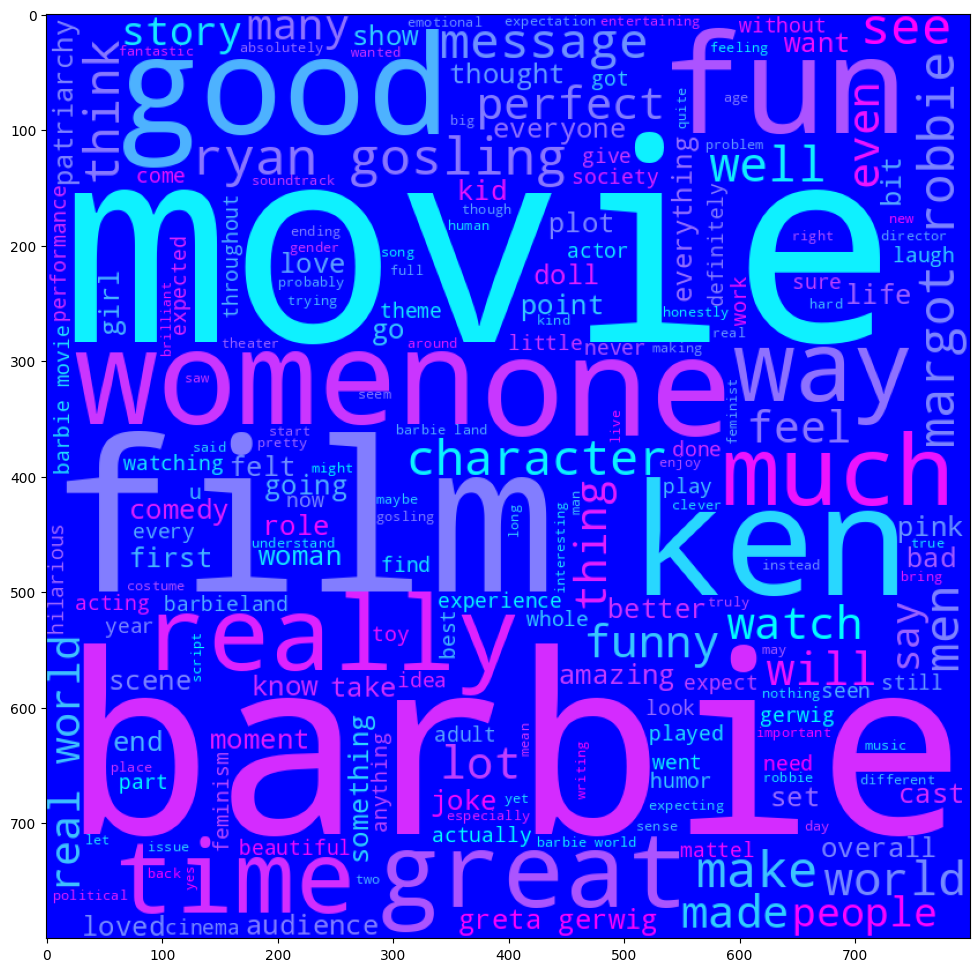

In [ ]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in File.Review:
    val = str(val)
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
color_map = 'cool'
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='blue',colormap=color_map,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

#plotting the WordCloud image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.show()

<Axes: xlabel='Rating', ylabel='count'>

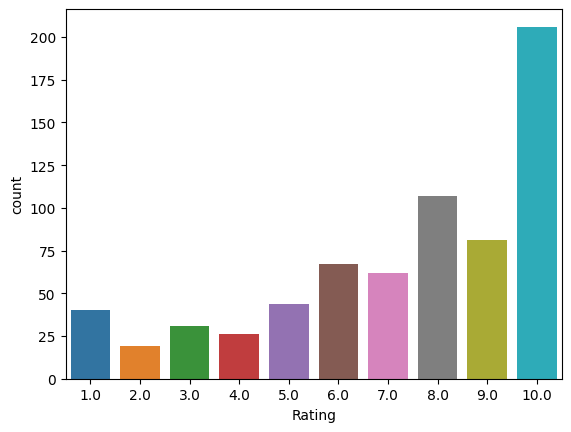

In [ ]:
sns.countplot(data=File, x='Rating')
#data = df, x = 'Rating'

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


True

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
!pip3 install tqdm

In [ ]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [ ]:
example=File["Review"][8]
sentiment_analyzer.polarity_scores(example)

{'neg': 0.021, 'neu': 0.614, 'pos': 0.364, 'compound': 0.9972}

In [ ]:
from tqdm import tqdm
compound_value = []
positive_value = []
negative_value = []
neutral_value = []

# Iterate through the DataFrame and calculate polarity scores
for i, row in tqdm(File.iterrows(), total=len(File)):
    text = row['Review']
    scores = sentiment_analyzer.polarity_scores(text)
    compound_value.append(scores['compound'])
    positive_value.append(scores['pos'])
    negative_value.append(scores['neg'])
    neutral_value.append(scores['neu'])

File['Compound_Score'] = compound_value
File['Positive_Score'] = positive_value
File['Negative_Score'] = negative_value
File['Neutral_Score'] = neutral_value

100%|██████████| 683/683 [00:02<00:00, 298.59it/s]


In [ ]:
File.head(4)

,Rating,Review,Compound_Score,Positive_Score,Negative_Score,Neutral_Score
0,6.0,Creative but preachy and confusingI'm just goi...,0.9893,0.239,0.123,0.638
1,6.0,"Beautiful film, but so preachyMargot does the ...",0.9637,0.220,0.121,0.659
2,6.0,"High Highs, Low Lows.The first thing you need ...",0.9964,0.181,0.062,0.757
3,10.0,"As a guy I felt some discomfort, and that's ok...",0.9891,0.189,0.067,0.744


Text Blob Model

In [ ]:
from textblob import TextBlob
textblob_scores = []

for i, row in tqdm(File.iterrows(), total=len(File)):
    text = row['Review']
    blob = TextBlob(text)
    textblob_scores.append(blob.sentiment.polarity)

File['TextBlob_Score'] = textblob_scores

100%|██████████| 683/683 [00:03<00:00, 227.66it/s]


In [ ]:
File.head()

,Rating,Review,Compound_Score,Positive_Score,Negative_Score,Neutral_Score,TextBlob_Score
0,6.0,Creative but preachy and confusingI'm just goi...,0.9893,0.239,0.123,0.638,0.124759
1,6.0,"Beautiful film, but so preachyMargot does the ...",0.9637,0.220,0.121,0.659,0.138651
2,6.0,"High Highs, Low Lows.The first thing you need ...",0.9964,0.181,0.062,0.757,0.193439
3,10.0,"As a guy I felt some discomfort, and that's ok...",0.9891,0.189,0.067,0.744,0.167063
4,9.0,"A Technicolor DreamWow, this movie was a love ...",0.9439,0.154,0.081,0.765,0.051824


Flair Model

In [ ]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 42.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')

flair_scores = []

for i, row in tqdm(File.iterrows(), total=len(File)):
    text = row['Review']
    sentence = Sentence(text)
    classifier.predict(sentence)
    flair_scores.append(sentence.labels[0].score)

File['Flair_Score'] = flair_scores

2023-08-28 15:15:54,768 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp6awbs2nt


100%|██████████| 253M/253M [00:26<00:00, 10.1MB/s]

2023-08-28 15:16:21,835 copying /tmp/tmp6awbs2nt to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-08-28 15:16:24,332 removing temp file /tmp/tmp6awbs2nt


100%|██████████| 683/683 [06:23<00:00,  1.78it/s]


In [ ]:
File.head()

,Rating,Review,Compound_Score,Positive_Score,Negative_Score,Neutral_Score,TextBlob_Score,Flair_Score
0,6.0,Creative but preachy and confusingI'm just goi...,0.9893,0.239,0.123,0.638,0.124759,0.999992
1,6.0,"Beautiful film, but so preachyMargot does the ...",0.9637,0.220,0.121,0.659,0.138651,0.999983
2,6.0,"High Highs, Low Lows.The first thing you need ...",0.9964,0.181,0.062,0.757,0.193439,0.999080
3,10.0,"As a guy I felt some discomfort, and that's ok...",0.9891,0.189,0.067,0.744,0.167063,0.999995
4,9.0,"A Technicolor DreamWow, this movie was a love ...",0.9439,0.154,0.081,0.765,0.051824,0.999398


In [ ]:
File = File.drop(columns = ['Positive_Score','Negative_Score','Neutral_Score', 'TextBlob_Score', 'Flair_Score'])
File.head()

,Rating,Review,Compound_Score
0,6.0,Creative but preachy and confusingI'm just goi...,0.9893
1,6.0,"Beautiful film, but so preachyMargot does the ...",0.9637
2,6.0,"High Highs, Low Lows.The first thing you need ...",0.9964
3,10.0,"As a guy I felt some discomfort, and that's ok...",0.9891
4,9.0,"A Technicolor DreamWow, this movie was a love ...",0.9439


In [ ]:
#renaming the column as sentiment
File = File.rename({'Compound_Score':'Sentiment'},axis=1)
File

,Rating,Review,Sentiment
0,6.0,Creative but preachy and confusingI'm just goi...,0.9893
1,6.0,"Beautiful film, but so preachyMargot does the ...",0.9637
2,6.0,"High Highs, Low Lows.The first thing you need ...",0.9964
3,10.0,"As a guy I felt some discomfort, and that's ok...",0.9891
4,9.0,"A Technicolor DreamWow, this movie was a love ...",0.9439
...,...,...,...
678,5.0,Hilarious with not very well thought out femin...,0.8736
679,2.0,Waste of timeIf ur over 13 this movie will mos...,-0.6353
680,2.0,Barbie-not goodThe only reason this movie even...,0.7393
681,1.0,Not for little kids and wastes your time.Too m...,-0.5793


In [ ]:
def sentiment(label):
    if label <0.5:
        return "Negative"
    elif 0.5 <= label <= 0.72:
        return "Neutral"
    elif label>0.72:
        return "Positive"
File['Sentiment'] = File['Sentiment'].apply(sentiment)

In [ ]:
File.head()

,Rating,Review,Sentiment
0,6.0,Creative but preachy and confusingI'm just goi...,Positive
1,6.0,"Beautiful film, but so preachyMargot does the ...",Positive
2,6.0,"High Highs, Low Lows.The first thing you need ...",Positive
3,10.0,"As a guy I felt some discomfort, and that's ok...",Positive
4,9.0,"A Technicolor DreamWow, this movie was a love ...",Positive


In [ ]:
File[File["Sentiment"] == "Neutral"]

,Rating,Review,Sentiment
21,8.0,I am KenoughSo I went into the movie with litt...,Neutral
34,10.0,Barbie is not a simple live action of a timele...,Neutral
35,5.0,More of a marketing flickThe brilliant marketi...,Neutral
41,6.0,Just a little emptyI really wanted to enjoy th...,Neutral
74,4.0,Way too preachyMy wife and I did the double fe...,Neutral
169,7.0,"It is, indeed, a Barbie worldGranted, my exper...",Neutral
272,6.0,The Lego Movie but for femalesNow please take ...,Neutral
340,1.0,BADI am just amazed how many good actors and a...,Neutral
383,10.0,what an amazing movieMore could you want from ...,Neutral
489,3.0,"Wonderfull setup, with a not so wonderfully ex...",Neutral


In [ ]:
File["Review"][682]

'Feminism but the rest?I\'m NOT a Barbie girl in NOT the Barbie World, Life in plastic, It\'s NOT fantastic. In the beginning of the film, it can be thought that will go nice way with a good end and a powerful message. There is so much effort in the beginning, like building a strong idea, however this is disappered in the final. And this is such a disappointment that the film does nothing about giving an idea about liberal feminism because there is always managers as boys or girls. I think the film\'s main idea should be every human being no matter it is a boy or a girl can be everything they want and can be handle every situation as a human. It is ridiculous to discuss this as "being a man or a woman" in the 2023. In the Barbie world or in the real world it should be out of date. The final should be reviewed with this manner cause the expactation was very high with this huge-budget film...'

Vander model works pretty well,most of the sentiments have accurate results except few.

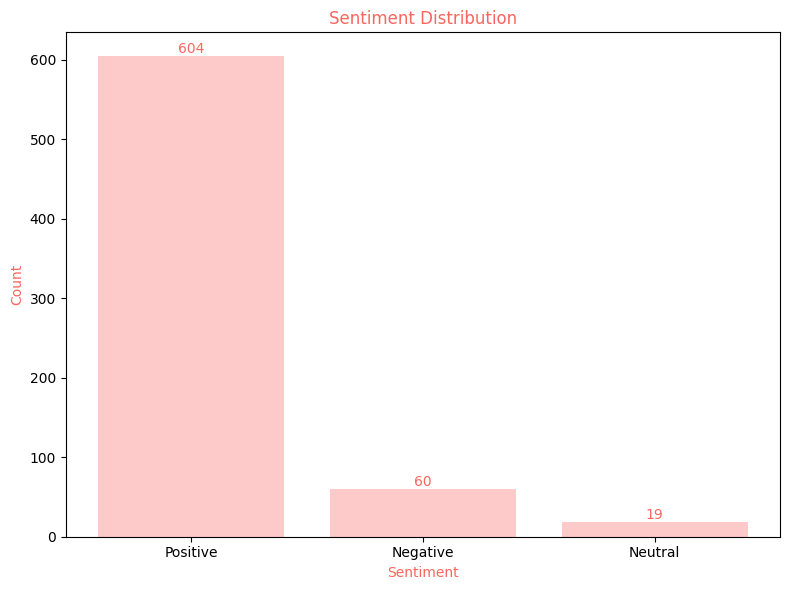

In [ ]:
value_counts = File['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts.values, color='#FEC9C9')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom',color = '#F9665E')

plt.xlabel('Sentiment',color = '#F9665E')
plt.ylabel('Count',color = '#F9665E')
plt.title('Sentiment Distribution',color = '#F9665E')
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

## **Hence, most reviews are positive for the Barbie movie.**